# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [102]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

'Когда-то я был добрым романтиком, который стремился помочь всем, кто попросит. Мне никогда не было себя жалко, я верил в человечность. Однако все это было фальшем, суррогатная дружба и какие-то непонятные отношения. Девушка, которая клялась, что любит, в итоге изменила да и ушла к другому. Другой так и не появилось - я бесперспективный, а попросту, без достаточного достатка и собственного жилья. Родители с шизофренией (F20.2) Меня никто никогда не поддерживал и не поддерживает. Итак, отдавая кусочек себя каждому, я потерял уже свое душевное тепло, мне стало безразлично, апатия. Бывшая девушка без всяких усилий нашла нового, который на ней сразу же женился и возит ее по разным странам мира. Конечно же, я брался за любую работу, чтобы показать, что не хуже, но меня часто обманывали - недоплачивали или не оплачивали вовсе. Я простой неудачник, который потерял смысл жизни. Мою ситуацию не спасает даже внешность - она ужасная (попросту урод), потому часто завидую тем, кому повезло с внешно

### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [9]:
df["age"].value_counts()

16.0      1823
17.0      1811
18.0      1661
15.0      1582
20.0      1543
          ... 
116.0        1
295.0        1
2425.0       1
92.0         1
830.0        1
Name: age, Length: 128, dtype: int64

1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [50]:
age14_s = df.loc[df.age >= 14]
age50_s = age14_s.loc[50 >= age14_s.age]

answer =  age50_s['age'].sum() / len(age50_s)
answer

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [59]:
amount_16 = age26_s.loc[age26_s.age == 16]
amount_no_16 = age26_s.loc[age26_s.age != 16]

answer = len(amount_16) / len(amount_no_16)
answer

0.1440878912424913

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [63]:
age28and30_s = df.loc[(df.age == 28) | (df.age == 30)]
answer = len(age28and30_s)
answer

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [65]:
age18_s = df.loc[df.age >= 18]
age30_s = age18_s.loc[30 >= age18_s.age]

answer = age30_s.age.describe()
answer

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [77]:
positive = df.loc[df.label == 1]
negative = df.loc[df.label == 0]

answer = print('Положительных примеров: ' + str(len(positive)) + '\n' + 
               'Отрицательных примеров: ' + str(len(negative)))

Положительных примеров: 32018
Отрицательных примеров: 32021


### Часть 2: Предобработка (3 балла)

1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [160]:
from razdel import sentenize
df['sent_count'] = ''
def snt_len(row):
    len_count = list(sentenize(row.text))
    row.sent_count = len(len_count)
    return row

df = df.apply(snt_len, axis='columns')

In [161]:
df.head()

,text,label,age,word_count,sent_count,tokenised,token_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,,15,,
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,,6,,
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,,10,,
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,,5,,
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,,18,,


2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [123]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /Users/egor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [162]:
from spacy.lang.ru import Russian
from spacy_russian_tokenizer import RussianTokenizer, MERGE_PATTERNS
from nltk.corpus import stopwords
# сразу аккуратно почистим пунктуацию
from string import punctuation
# добавил стоп-слова
russian_stopwords = stopwords.words("russian")
# настраиваю токенизатор, чтобы красиво работал
russian_tokenizer = RussianTokenizer(nlp, MERGE_PATTERNS)
nlp = Russian()
nlp.add_pipe(russian_tokenizer, name='russian_tokenizer')
# добавлю колонку для токенизированного текста
df['tokenised'] = ''
# сама функция
def tokenised(row):
    doc = nlp(row.text.lower())
    tokens = [token.text for token in doc]
    tokens = [token for token in tokens if token not in russian_stopwords
              and token != " " 
              and token.strip() not in punctuation]
    row.tokenised = tokens
    return row

df = df.apply(tokenised, axis='columns')

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [170]:
# для превращения стринга, похожего на лист, в лист
import json
# делаю графу 'длина в токенах' для датафрейма
df['token_count'] = ''
# функция для заполнения этой графы количеством токенов для каждого текста
def token_counter(cell):
    return len(cell)
# применяю функцию
df['token_count'] = df.tokenised.apply(token_counter)
# выделяю датафреймы для позитивного и негативного классов
positive = df.loc[df.label == 1]
negative = df.loc[df.label == 0]
# считаю среднее для трех датафреймов
all_mean = df.token_count.mean()
pos_mean = positive.token_count.mean()
neg_mean = negative.token_count.mean()
# вывожу
print('Среднее по всей выборке: ' + str(all_mean) + '\n' +
      'Среднее по позитивному классу: ' + str(pos_mean) + '\n' +
      'Среднее по негативному классу: ' + str(neg_mean))
df.head()

Среднее по всей выборке: 111.63348896766033
Среднее по позитивному классу: 71.67630707726903
Среднее по негативному классу: 151.5869273289404


,text,label,age,sent_count,tokenised,token_count
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когда-то, добрым, романтиком, который, стреми...",157
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью...",64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере...",43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, это, сплошной, ад, котором, горю,...",25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснуться.каждый, день, одно, ...",195


4. Напишите функцию, которая переводит текст в последовательность лемм.

In [173]:
from pymystem3 import Mystem
mystem = Mystem()
df['lemmatised'] = ''
def lemmatisation(cell):
    tokens = mystem.lemmatize(cell.lower())
    text = " ".join(tokens)
    return text
df['lemmatised'] = df.text.apply(lemmatisation)

In [177]:
df

,text,label,age,sent_count,tokenised,token_count,lemmatised,POS
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когда-то, добрым, романтиком, который, стреми...",157,"когда-то я быть добрый романтик , кот...",
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью...",64,здраствовать ! я каждый день просыпать...,
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере...",43,у я проблема с девушка . каждый сс...,
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, это, сплошной, ад, котором, горю,...",25,весь мой жизнь это один сплошной а...,
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснуться.каждый, день, одно, ...",195,я хотеть уснуть и не просыпаться . к...,
...,...,...,...,...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1,"[южная, корея, внедрять, свои, технологии, каз...",22,южный корея быть внедрять свой техно...,
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6,"[минувшие, выходные, спортблоке, калмгу, прошл...",66,в минувший выходной в спортблок калм...,
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19,"[втб, подвел, итоги, первого, корпоративного, ...",229,втб подводить итог первый корпоративны...,
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6,"[втб, запустит, бесплатное, пополнение, карт, ...",102,втб запускать бесплатный пополнение ка...,


5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [178]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [189]:
df['POS'] = ''
def pos(cell):
    list_pos_tags = []
    doc = Doc(cell)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for element in doc.tokens:
        list_pos_tags.append(element.pos)
    text = ' '.join(list_pos_tags)
    return text
df['POS'] = df.text.apply(pos)

In [209]:
df.to_csv('data_compling_hw1.csv', sep='\t')

6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

In [210]:
badwords = [
u'я', u'а', u'да', u'но', u'тебе', u'мне', u'ты', u'и', u'у', u'на', u'ща', u'ага',
u'так', u'там', u'какие', u'который', u'какая', u'туда', u'давай', u'короче', u'кажется', u'вообще',
u'ну', u'не', u'чет', u'неа', u'свои', u'наше', u'хотя', u'такое', u'например', u'кароч', u'как-то',
u'нам', u'хм', u'всем', u'нет', u'да', u'оно', u'своем', u'про', u'вы', u'м', u'тд',
u'вся', u'кто-то', u'что-то', u'вам', u'это', u'эта', u'эти', u'этот', u'прям', u'либо', u'как', u'мы',
u'просто', u'блин', u'очень', u'самые', u'твоем', u'ваша', u'кстати', u'вроде', u'типа', u'пока', u'ок'
]


Я бы добавил эти слова, потому что: 
- список стопслов от нлтк не включает в себя некоторые формы стопслов
    - Например: [этот, этого, этом, эту] включены, а [это, эта] не включены в список
- многие слова были получены эмпирическим путем во время реализации NLP задач
    - парсинг твиттера, например, добавил слова "ща", "короч" и т.п., добавить которые для обработки пользователських текстов задания кажется хорошей идеей.

Сам список стопслов нлтк не совсем адекватен, потому что создатели приняли решение базироваться на определенном стемминговом подходе **(PORTER, M. F. 1980. "An Algorithm for Suffix Stripping." Program, 14(3), 130-37)**
и я это вполне понимаю.


### Часть 3: Визуализация (1 балл)

In [190]:
import numpy as np
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')
# Create Bokeh-Table with DataFrame:
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

Loading BokehJS ...

1. Визуализируйте распределение количество предложений / текст.

**План:**
нужно создать серию, где будет индекс - количество предложений в тексте, а значения - количество текстов с таким количеством предложений.

На самом деле, я бы обрезал дальнюю правую часть датасета и рисовал бы начало, чтобы было красивее.

In [195]:
list_of_sent_count1 = df.sent_count.value_counts()
list_of_sent_count1

1      14297
2       7390
3       5650
4       4317
5       3588
       ...  
210        1
136        1
195        1
187        1
319        1
Name: sent_count, Length: 195, dtype: int64

In [ ]:
series_visual = df.sent_count.value_counts()
#визуализация
series_visual.plot_bokeh(kind="hist",title ="Распределение количества предложений",
                   figsize =(1000,1000),
                   xlabel = "количество предложений",
                   ylabel="количество текстов",
                   bins = 2000
                )

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [211]:
positive = df.loc[df.label == 1]
negative = df.loc[df.label == 0]
list_of_sent_count_positive = positive.sent_count.value_counts()
list_of_sent_count_negative = negative.sent_count.value_counts()
list_of_sent_count_positive, list_of_sent_count_negative

(1      9564
 2      3983
 3      2761
 4      1904
 5      1379
        ... 
 188       1
 197       1
 133       1
 117       1
 319       1
 Name: sent_count, Length: 130, dtype: int64, 1      4733
 2      3407
 3      2889
 4      2413
 5      2209
        ... 
 151       1
 183       1
 210       1
 226       1
 115       1
 Name: sent_count, Length: 189, dtype: int64)

In [ ]:
list_of_sent_count_positive.plot_bokeh(kind="hist",title ="Распределение количества предложений, позитивный клас",
                   figsize =(1000,1000),
                   xlabel = "количество предложений",
                   ylabel="количество текстов",
                   bins = 2000
                )

In [ ]:
list_of_sent_count_negative.plot_bokeh(kind="hist",title ="Распределение количества предложений, негативный класс",
                   figsize =(1000,1000),
                   xlabel = "количество предложений",
                   ylabel="количество текстов",
                   bins = 2000
                )

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [232]:
age16_s = df.loc[df.age >= 16]
age32_s = age16_s.loc[32 >= age16_s.age]
age32_s = age32_s.drop(['label', 'token_count'], axis=1)
age32_s = age32_s.corr(method ='pearson')
age32_s

,age,sent_count
age,1.000000,0.039831
sent_count,0.039831,1.000000


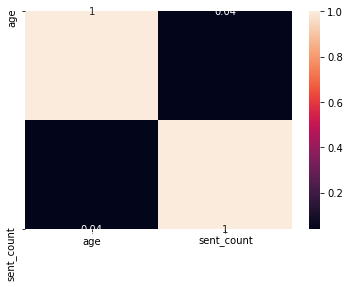

In [233]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(age32_s, annot=True)
plt.show()

Корреляция между возрастом и количеством предложений положительная

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [243]:
def char_ngrams(text, n):
    return [text[i:i+n] for i in range(len(text)-n+1)]

In [244]:
text = "уставшая мама мыла грязную раму"
n = 3
char_ngrams(text, n)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

In [245]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [246]:
def char_ngrams_words(text, n):
    text = text.split(' ')
    return [text[i:i+n] for i in range(len(text)-n+1)]

In [248]:
text = "уставшая мама мыла грязную раму"
n = 4
char_ngrams_words(text, n)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

In [ ]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [271]:
# я, честно говоря, не совсем понял что от меня хотели, 
# поэтому привожу функцию, которая работает через "df.lemmatised[0]" для быстроты 
# проверки работы программы и простоты реализации,
# но, мне кажется, что на этом этапе уже понятно
# и не требует доказательств, что я смогу добавить for и переписать эту функцию
# для имплементации на весь датафрейм.
# я в дальнейшем сделаю задания по тому же принципу ради того, 
# чтобы не ждать по часу обработки всех 60к документов
# прошу вас, не снижайте за это, пожалуйста.
import re
def n_gramm_lemm(df, n):
    entity_split = re.split(r'\s+', df.lemmatised[0])
    print(entity_split)
    return [entity_split[i:i+n] for i in range(len(entity_split)-n+1)]
n_gramm_lemm(df,4)

['когда-то', 'я', 'быть', 'добрый', 'романтик', ',', 'который', 'стремиться', 'помогать', 'все', ',', 'кто', 'попросить', '.', 'я', 'никогда', 'не', 'быть', 'себя', 'жалко', ',', 'я', 'верить', 'в', 'человечность', '.', 'однако', 'весь', 'это', 'быть', 'фальший', ',', 'суррогатный', 'дружба', 'и', 'какой-то', 'непонятный', 'отношение', '.', 'девушка', ',', 'который', 'клясться', ',', 'что', 'любить', ',', 'в', 'итог', 'изменять', 'да', 'и', 'уходить', 'к', 'другой', '.', 'другой', 'так', 'и', 'не', 'появляться', '-', 'я', 'бесперспективный', ',', 'а', 'попросту', ',', 'без', 'достаточный', 'достаток', 'и', 'собственный', 'жилье', '.', 'родитель', 'с', 'шизофрения', '(', 'f', '20.2', ')', 'я', 'никто', 'никогда', 'не', 'поддерживать', 'и', 'не', 'поддерживать', '.', 'итак', ',', 'отдавать', 'кусочек', 'себя', 'каждый', ',', 'я', 'потерять', 'уже', 'свой', 'душевный', 'тепло', ',', 'я', 'становиться', 'безразлично', ',', 'апатия', '.', 'бывший', 'девушка', 'без', 'всякий', 'усилие', 'нах

[['когда-то', 'я', 'быть', 'добрый'],
 ['я', 'быть', 'добрый', 'романтик'],
 ['быть', 'добрый', 'романтик', ','],
 ['добрый', 'романтик', ',', 'который'],
 ['романтик', ',', 'который', 'стремиться'],
 [',', 'который', 'стремиться', 'помогать'],
 ['который', 'стремиться', 'помогать', 'все'],
 ['стремиться', 'помогать', 'все', ','],
 ['помогать', 'все', ',', 'кто'],
 ['все', ',', 'кто', 'попросить'],
 [',', 'кто', 'попросить', '.'],
 ['кто', 'попросить', '.', 'я'],
 ['попросить', '.', 'я', 'никогда'],
 ['.', 'я', 'никогда', 'не'],
 ['я', 'никогда', 'не', 'быть'],
 ['никогда', 'не', 'быть', 'себя'],
 ['не', 'быть', 'себя', 'жалко'],
 ['быть', 'себя', 'жалко', ','],
 ['себя', 'жалко', ',', 'я'],
 ['жалко', ',', 'я', 'верить'],
 [',', 'я', 'верить', 'в'],
 ['я', 'верить', 'в', 'человечность'],
 ['верить', 'в', 'человечность', '.'],
 ['в', 'человечность', '.', 'однако'],
 ['человечность', '.', 'однако', 'весь'],
 ['.', 'однако', 'весь', 'это'],
 ['однако', 'весь', 'это', 'быть'],
 ['весь', '

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [ ]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'],
 ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [272]:
import re
def n_gramm_pos(df, n):
    entity_split = re.split(r'\s+', df.POS[0])
    print(entity_split)
    return [entity_split[i:i+n] for i in range(len(entity_split)-n+1)]
n_gramm_pos(df,4)

['ADV', 'PRON', 'AUX', 'ADJ', 'NOUN', 'PUNCT', 'PRON', 'VERB', 'VERB', 'DET', 'PUNCT', 'PRON', 'VERB', 'PUNCT', 'PRON', 'ADV', 'PART', 'AUX', 'PRON', 'ADV', 'PUNCT', 'PRON', 'VERB', 'ADP', 'NOUN', 'PUNCT', 'ADV', 'DET', 'PRON', 'AUX', 'VERB', 'PUNCT', 'ADJ', 'NOUN', 'CCONJ', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'PRON', 'VERB', 'PUNCT', 'SCONJ', 'VERB', 'PUNCT', 'ADP', 'NOUN', 'VERB', 'CCONJ', 'CCONJ', 'VERB', 'ADP', 'ADJ', 'PUNCT', 'ADJ', 'ADV', 'PART', 'PART', 'VERB', 'PUNCT', 'PRON', 'ADJ', 'PUNCT', 'CCONJ', 'PART', 'PUNCT', 'ADP', 'ADJ', 'NOUN', 'CCONJ', 'ADJ', 'NOUN', 'PUNCT', 'NOUN', 'ADP', 'NOUN', 'PUNCT', 'PROPN', 'NUM', 'PUNCT', 'PRON', 'PRON', 'ADV', 'PART', 'VERB', 'CCONJ', 'PART', 'VERB', 'PUNCT', 'ADV', 'PUNCT', 'VERB', 'NOUN', 'PRON', 'DET', 'PUNCT', 'PRON', 'VERB', 'ADV', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'PRON', 'VERB', 'ADJ', 'PUNCT', 'NOUN', 'PUNCT', 'ADJ', 'NOUN', 'ADP', 'DET', 'NOUN', 'VERB', 'ADJ', 'PUNCT', 'PRON', 'ADP', 'PRON', 'ADV', 'PART', 'VERB', 'CCON

[['ADV', 'PRON', 'AUX', 'ADJ'],
 ['PRON', 'AUX', 'ADJ', 'NOUN'],
 ['AUX', 'ADJ', 'NOUN', 'PUNCT'],
 ['ADJ', 'NOUN', 'PUNCT', 'PRON'],
 ['NOUN', 'PUNCT', 'PRON', 'VERB'],
 ['PUNCT', 'PRON', 'VERB', 'VERB'],
 ['PRON', 'VERB', 'VERB', 'DET'],
 ['VERB', 'VERB', 'DET', 'PUNCT'],
 ['VERB', 'DET', 'PUNCT', 'PRON'],
 ['DET', 'PUNCT', 'PRON', 'VERB'],
 ['PUNCT', 'PRON', 'VERB', 'PUNCT'],
 ['PRON', 'VERB', 'PUNCT', 'PRON'],
 ['VERB', 'PUNCT', 'PRON', 'ADV'],
 ['PUNCT', 'PRON', 'ADV', 'PART'],
 ['PRON', 'ADV', 'PART', 'AUX'],
 ['ADV', 'PART', 'AUX', 'PRON'],
 ['PART', 'AUX', 'PRON', 'ADV'],
 ['AUX', 'PRON', 'ADV', 'PUNCT'],
 ['PRON', 'ADV', 'PUNCT', 'PRON'],
 ['ADV', 'PUNCT', 'PRON', 'VERB'],
 ['PUNCT', 'PRON', 'VERB', 'ADP'],
 ['PRON', 'VERB', 'ADP', 'NOUN'],
 ['VERB', 'ADP', 'NOUN', 'PUNCT'],
 ['ADP', 'NOUN', 'PUNCT', 'ADV'],
 ['NOUN', 'PUNCT', 'ADV', 'DET'],
 ['PUNCT', 'ADV', 'DET', 'PRON'],
 ['ADV', 'DET', 'PRON', 'AUX'],
 ['DET', 'PRON', 'AUX', 'VERB'],
 ['PRON', 'AUX', 'VERB', 'PUNCT'],
 ['

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [273]:
df

,text,label,age,sent_count,tokenised,token_count,lemmatised,POS
0,"Когда-то я был добрым романтиком, который стре...",1,32.0,15,"[когда-то, добрым, романтиком, который, стреми...",157,"когда-то я быть добрый романтик , кот...",ADV PRON AUX ADJ NOUN PUNCT PRON VERB VERB DET...
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0,6,"[здраствуйте, каждый, день, просыпаюсь, мыслью...",64,здраствовать ! я каждый день просыпать...,PROPN PUNCT PRON DET NOUN VERB ADP NOUN ADV PR...
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0,10,"[проблемы, девушкой, каждую, ссору, могу, пере...",43,у я проблема с девушка . каждый сс...,ADP PRON NOUN ADP NOUN PUNCT DET NOUN PRON PAR...
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0,5,"[вся, жизнь, это, сплошной, ад, котором, горю,...",25,весь мой жизнь это один сплошной а...,DET DET NOUN PART NUM ADJ NOUN PUNCT ADP PRON ...
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0,18,"[хочу, уснуть, проснуться.каждый, день, одно, ...",195,я хотеть уснуть и не просыпаться . к...,PRON VERB VERB CCONJ PART VERB PUNCT DET NOUN ...
...,...,...,...,...,...,...,...,...
64034,Южная Корея будет внедрять свои технологии в К...,0,NaN,1,"[южная, корея, внедрять, свои, технологии, каз...",22,южный корея быть внедрять свой техно...,ADJ PROPN AUX VERB DET NOUN ADP PROPN X PUNCT ...
64035,В минувшие выходные в спортблоке КалмГУ прошли...,0,NaN,6,"[минувшие, выходные, спортблоке, калмгу, прошл...",66,в минувший выходной в спортблок калм...,ADP ADJ NOUN ADP ADJ PROPN VERB ADJ NOUN ADJ N...
64036,ВТБ подвел итоги первого корпоративного акселе...,0,NaN,19,"[втб, подвел, итоги, первого, корпоративного, ...",229,втб подводить итог первый корпоративны...,PROPN VERB NOUN ADJ ADJ NOUN PUNCT VERB ADV AD...
64037,ВТБ запустит бесплатное пополнение карт других...,0,NaN,6,"[втб, запустит, бесплатное, пополнение, карт, ...",102,втб запускать бесплатный пополнение ка...,PROPN VERB ADJ NOUN NOUN ADJ NOUN ADP DET NOUN...


In [283]:
def dict_pos(df):
    list_of_tags_count = []
    entity_split = re.split(r'\s+', df.POS[0])
    set_entity_split = set(entity_split)
    for tag in set_entity_split:
        list_of_tags_count.append(entity_split.count(tag))
    answer = dict(zip(set_entity_split, list_of_tags_count))
    return answer
dict_pos(df)

{'PUNCT': 62,
 'VERB': 51,
 'SCONJ': 12,
 'AUX': 4,
 'PART': 26,
 'CCONJ': 14,
 'ADP': 16,
 'PRON': 46,
 'NUM': 1,
 'PROPN': 1,
 'ADJ': 19,
 'ADV': 27,
 'DET': 18,
 'NOUN': 34}

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [324]:
from collections import Counter
# выделяю датафреймы для позитивного и негативного классов
positive = df.loc[df.label == 1]
negative = df.loc[df.label == 0]
positive = positive[:250]
negative = negative[:250]
df_small = df[:500]
# придется ресетнуть индекс, чтобы дальше удобно ходить вайлом
negative = negative.reset_index(drop=True)
df_small = df_small.reset_index(drop=True)

In [325]:
# positive
i = 0
final_list = []
while i < len(positive):
    entity_split = re.split(r'\s+', positive.lemmatised[i])
    for element in entity_split:
        final_list.append(element)
    i += 1
positive_counter = Counter(final_list)
positive_counter

Counter({'когда-то': 1,
         'я': 2453,
         'быть': 482,
         'добрый': 24,
         'романтик': 1,
         ',': 3189,
         'который': 116,
         'стремиться': 1,
         'помогать': 81,
         'все': 339,
         'кто': 78,
         'попросить': 8,
         '.': 2508,
         'никогда': 35,
         'не': 1261,
         'себя': 225,
         'жалко': 10,
         'верить': 24,
         'в': 743,
         'человечность': 1,
         'однако': 6,
         'весь': 198,
         'это': 303,
         'фальший': 1,
         'суррогатный': 1,
         'дружба': 1,
         'и': 1100,
         'какой-то': 16,
         'непонятный': 1,
         'отношение': 44,
         'девушка': 30,
         'клясться': 2,
         'что': 652,
         'любить': 60,
         'итог': 20,
         'изменять': 10,
         'да': 49,
         'уходить': 54,
         'к': 122,
         'другой': 82,
         'так': 194,
         'появляться': 17,
         '-': 153,
         'бесперспекти

In [326]:
# negative
i = 0
final_list = []
while i < len(negative):
    entity_split = re.split(r'\s+', negative.lemmatised[i])
    for element in entity_split:
        final_list.append(element)
    i += 1
negative_counter = Counter(final_list)
negative_counter

Counter({'долгожданный': 4,
         'тройня': 4,
         'появляться': 18,
         'на': 556,
         'свет': 12,
         'в': 1385,
         'талдыкорган': 10,
         'девочка': 6,
         'областной': 13,
         'перинатальный': 2,
         'центр': 76,
         'город': 94,
         '.': 2491,
         'они': 89,
         'давать': 25,
         'имя': 17,
         'алиша': 1,
         ',': 2263,
         'алима': 1,
         'и': 1101,
         'альмира': 1,
         'аким': 37,
         'алматинский': 36,
         'область': 134,
         'амандык': 3,
         'баталов': 3,
         'подарить': 10,
         '3': 61,
         '-': 1196,
         'х': 15,
         'комнатный': 3,
         'квартира': 7,
         'семья': 44,
         'где': 46,
         'родиться': 7,
         'тройняшка': 1,
         'разделять': 2,
         'радость': 5,
         'поздравлять': 8,
         'лично': 5,
         'молодой': 16,
         'родитель': 13,
         'приезжать': 5,
         'зам

In [327]:
# all
i = 0
final_list = []
while i < len(df_small):
    entity_split = re.split(r'\s+', df_small.lemmatised[i])
    for element in entity_split:
        final_list.append(element)
    i += 1
all_counter = Counter(final_list)

positive_counter, negative_counter, all_counter

(Counter({'когда-то': 1,
          'я': 2453,
          'быть': 482,
          'добрый': 24,
          'романтик': 1,
          ',': 3189,
          'который': 116,
          'стремиться': 1,
          'помогать': 81,
          'все': 339,
          'кто': 78,
          'попросить': 8,
          '.': 2508,
          'никогда': 35,
          'не': 1261,
          'себя': 225,
          'жалко': 10,
          'верить': 24,
          'в': 743,
          'человечность': 1,
          'однако': 6,
          'весь': 198,
          'это': 303,
          'фальший': 1,
          'суррогатный': 1,
          'дружба': 1,
          'и': 1100,
          'какой-то': 16,
          'непонятный': 1,
          'отношение': 44,
          'девушка': 30,
          'клясться': 2,
          'что': 652,
          'любить': 60,
          'итог': 20,
          'изменять': 10,
          'да': 49,
          'уходить': 54,
          'к': 122,
          'другой': 82,
          'так': 194,
          'появляться': 17,

In [330]:
positive_counter.most_common(15), negative_counter.most_common(15), all_counter.most_common(15)

([(',', 3189),
  ('.', 2508),
  ('я', 2453),
  ('не', 1261),
  ('и', 1100),
  ('в', 743),
  ('что', 652),
  ('с', 530),
  ('быть', 482),
  ('но', 420),
  ('на', 375),
  ('все', 339),
  ('у', 304),
  ('это', 303),
  ('он', 266)],
 [('.', 2491),
  (',', 2263),
  ('в', 1385),
  ('-', 1196),
  ('и', 1101),
  ('«', 568),
  ('на', 556),
  (':', 431),
  ('с', 414),
  ('»', 406),
  ('по', 361),
  ('–', 339),
  ('/', 330),
  ('год', 265),
  ('', 265)],
 [(',', 6349),
  ('.', 5100),
  ('я', 4876),
  ('не', 2549),
  ('и', 2169),
  ('в', 1535),
  ('что', 1421),
  ('с', 1001),
  ('быть', 990),
  ('но', 811),
  ('на', 748),
  ('все', 686),
  ('это', 665),
  ('у', 607),
  ('он', 551)])

**пересечение между классами есть, пересекаются 6 лемм**

7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

# Ответ
Если предположить, что дистрибуция самых популярных лемм будет такая же разная по классам, как с нынешней поверхностной обработкой, то в качестве дифференцирующих признаков вполне можно взять, допустим, употребленные существительные после лемматизации и стемминга. Я бы сделал это с помощью модуля natasha.
